In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
import csv

# Census & gmaps API Keys
from config import (api_key, gkey)
c = Census(api_key, year=2020)

# Configure gmaps
gmaps.configure(api_key=gkey)

# State FIPS codes
# This is where you're going to import the FIPS codes from States.csv
states_df = pd.read_csv('resources/States.csv')

In [2]:
# 60637:University of Chicago
# 10027:Colombia University
# 60201:Northwestern University
# 10012:NYU
# 90007:USC
# 19104:University of Pennsylvania
# 27701:Duke
# 63130:Washington University
# 10458:Fordham University
# 91103:California Institute of Technology

In [3]:
#c_variablesLink = "http://api.census.gov/data/2020/acs/acs5/variables.json"
#variablesData = requests.get(c_variablesLink).json()
#variables_pd = pd.DataFrame(variablesData)
# print(variables_pd)
#variables_pd.to_csv('variabledata.csv')

In [4]:
# print(states_df.loc("code",0))

# print (states_df.query('Code" == "0"')["Abbreviation"])
# states_df.query('Code == 1')['Abbreviation']

# states_df


In [17]:
Universities = {'University':['University of Chicago','Colombia University','Northwestern University','NYU','USC','University of Pennsylvania','Duke','Washington University','Fordham University','California Institute of Technology'],
                'Zip Code':[60637, 10027, 60201, 10012, 90007, 19104, 27701, 63130, 10458, 91103]}
Universities_df = pd.DataFrame(Universities)

Universities_df

,University,Zip Code
0,University of Chicago,60637
1,Colombia University,10027
2,Northwestern University,60201
3,NYU,10012
4,USC,90007
5,University of Pennsylvania,19104
6,Duke,27701
7,Washington University,63130
8,Fordham University,10458
9,California Institute of Technology,91103


In [16]:
census_data_Highest = c.acs5.get(("B17020_002E","B17020_010E","B01003_001E"), {"for": "zip code tabulation area:60637,10027,60201,10012,90007,19104,27701,63130,10458,91103"})
census_pd_Highest = pd.DataFrame(census_data_Highest)
# census_pd_Highest['respondantTotal'] = census_pd_Highest.sum(axis=1, numeric_only= True)
census_pd_Highest = census_pd_Highest.rename(columns={"zip code tabulation area":"Zip Code",
                                                        "B17020_002E":"Total living in poverty",
                                                        "B17020_010E":"Total living above poverty",
                                                        "B01003_001E":"Total Respondants"
                                                       })

census_pd_Highest['Pecentage of respondants living in poverty'] = (census_pd_Highest["Total living in poverty"] 
                                                                   / census_pd_Highest["Total Respondants"])
census_pd_Highest['Pecentage of respondants living above poverty'] = (census_pd_Highest["Total living above poverty"] 
                                                                   / census_pd_Highest["Total Respondants"])

census_pd_Highest.loc[:, 'Pecentage of respondants living in poverty'] = census_pd_Highest['Pecentage of respondants living in poverty'].map('{:.2%}'.format)
census_pd_Highest.loc[:, 'Pecentage of respondants living above poverty'] = census_pd_Highest['Pecentage of respondants living above poverty'].map('{:.2%}'.format)

census_pd_Highest

,Total living in poverty,Total living above poverty,Total Respondants,Zip Code,Pecentage of respondants living in poverty,Pecentage of respondants living above poverty
0,16652.0,22252.0,52480.0,19104,31.73%,42.40%
1,13049.0,44800.0,64728.0,10027,20.16%,69.21%
2,5012.0,21058.0,26837.0,91103,18.68%,78.47%
3,14934.0,28283.0,46621.0,60637,32.03%,60.67%
4,13792.0,22640.0,42380.0,90007,32.54%,53.42%
5,3982.0,23917.0,29080.0,63130,13.69%,82.25%
6,6116.0,16743.0,23415.0,27701,26.12%,71.51%
7,5492.0,29510.0,41386.0,60201,13.27%,71.30%
8,26616.0,56332.0,85893.0,10458,30.99%,65.58%
9,2397.0,19417.0,23034.0,10012,10.41%,84.30%


In [26]:
highest_merge = census_pd_Highest.merge(Universities_df, left_on="Zip Code", right_on="Zip Code")

AttributeError: 'DataFrame' object has no attribute 'concat'

In [6]:
census_data_Random = c.acs5.get(("B17020_002E","B17020_010E","B01003_001E"), {"for": "zip code tabulation area:98125,98391,27405,32073,33604,90804,96720,29466,07960,77901"})
census_pd_Random = pd.DataFrame(census_data_Random)
#census_pd_Random['respondantTotal'] = census_pd_Random.sum(axis=1, numeric_only= True)
census_pd_Random = census_pd_Random.rename(columns={"zip code tabulation area":"Zip Code",
                                                        "B17020_002E":"Total living in poverty",
                                                        "B17020_010E":"Total living above poverty",
                                                        "B01003_001E":"Total Respondants"
                                                       })
census_pd_Random['Pecentage of respondants living in poverty'] = (census_pd_Random["Total living in poverty"] 
                                                                   / census_pd_Random["Total Respondants"])
census_pd_Random['Pecentage of respondants living above poverty'] = (census_pd_Random["Total living above poverty"] 
                                                                   / census_pd_Random["Total Respondants"])

census_pd_Random.loc[:, 'Pecentage of respondants living in poverty'] = census_pd_Random['Pecentage of respondants living in poverty'].map('{:.2%}'.format)
census_pd_Random.loc[:, 'Pecentage of respondants living above poverty'] = census_pd_Random['Pecentage of respondants living above poverty'].map('{:.2%}'.format)

census_pd_Random

,Total living in poverty,Total living above poverty,Total Respondants,Zip Code,Pecentage of respondants living in poverty,Pecentage of respondants living above poverty
0,4627.0,39193.0,44030.0,98125,10.51%,89.01%
1,4368.0,37115.0,42153.0,32073,10.36%,88.05%
2,2832.0,40815.0,44998.0,07960,6.29%,90.70%
3,1087.0,40200.0,41466.0,29466,2.62%,96.95%
4,7740.0,38747.0,48647.0,96720,15.91%,79.65%
5,2159.0,50357.0,52686.0,98391,4.10%,95.58%
6,7496.0,29341.0,38151.0,90804,19.65%,76.91%
7,13708.0,37087.0,51160.0,27405,26.79%,72.49%
8,9871.0,31680.0,42620.0,77901,23.16%,74.33%
9,8874.0,31251.0,40309.0,33604,22.01%,77.53%


In [7]:
census_data_povGender_Highest = c.acs5.get(("B17003_004E","B17003_005E","B17003_006E","B17003_007E","B17003_009E","B17003_010E",
						  "B17003_011E","B17003_012E","B17003_015E","B17003_016E","B17003_017E","B17003_018E","B17003_020E",
						  "B17003_021E","B17003_022E","B17003_023E","B01003_001E"), {"for": "zip code tabulation area:60637,10027,60201,10012,90007,19104,27701,63130,10458,91103"})
census_pd_povGender_Highest = pd.DataFrame(census_data_povGender_Highest)



census_pd_povGender_Highest = census_pd_povGender_Highest.rename(columns={"B17003_004E":"Male Below Poverty: Less than high school graduate",
									"B17003_005E":"Male Below Poverty: High school graduate (includes equivalency)",
									"B17003_006E":"Male Below Poverty: Some college, associate's degree",
									"B17003_007E":"Male Below Poverty: Bachelor's degree or higher",
									"B17003_009E":"Female Below Poverty: Less than high school graduate",
									"B17003_010E":"Female Below Poverty: High school graduate (includes equivalency)",
									"B17003_011E":"Female Below Poverty: Some college, associate's degree",
									"B17003_012E":"Female Below Poverty: Bachelor's degree or higher",
									"B17003_015E":"Male Above Poverty: Less than high school graduate",
									"B17003_016E":"Male Above Poverty: High school graduate (includes equivalency)",
									"B17003_017E":"Male Above Poverty: Some college, associate's degree",
									"B17003_018E":"Male Above Poverty: Bachelor's degree or higher",
									"B17003_020E":"Female Above Poverty: Less than high school graduate",
									"B17003_021E":"Female Above Poverty: High school graduate (includes equivalency)",
									"B17003_022E":"Female Above Poverty: Some college, associate's degree",
									"B17003_023E":"Female Above Poverty: Bachelors degree or higher",
                                     "zip code tabulation area":"Zip Code",
                                     "B01003_001E": "Total Respondants" })
census_pd_povGender_Highest['Total below poverty: Less than High School Graduate'] = (census_pd_povGender_Highest["Male Below Poverty: Less than high school graduate"]
         + census_pd_povGender_Highest["Female Below Poverty: Less than high school graduate"])
census_pd_povGender_Highest['Total below poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Highest["Male Below Poverty: High school graduate (includes equivalency)"]
         + census_pd_povGender_Highest["Female Below Poverty: High school graduate (includes equivalency)"])
census_pd_povGender_Highest["Total below poverty: Some college, associate's degree"] = (census_pd_povGender_Highest["Male Below Poverty: Some college, associate's degree"]
         + census_pd_povGender_Highest["Female Below Poverty: Some college, associate's degree"])
census_pd_povGender_Highest["Total below poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Highest["Male Below Poverty: Bachelor's degree or higher"]
         + census_pd_povGender_Highest["Female Below Poverty: Bachelor's degree or higher"])

census_pd_povGender_Highest['Total Above poverty: Less than High School Graduate'] = (census_pd_povGender_Highest["Male Above Poverty: Less than high school graduate"]
         + census_pd_povGender_Highest["Female Above Poverty: Less than high school graduate"])
census_pd_povGender_Highest['Total Above poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Highest["Male Above Poverty: High school graduate (includes equivalency)"]
         + census_pd_povGender_Highest["Female Above Poverty: High school graduate (includes equivalency)"])
census_pd_povGender_Highest["Total Above poverty: Some college, associate's degree"] = (census_pd_povGender_Highest["Male Above Poverty: Some college, associate's degree"]
         + census_pd_povGender_Highest["Female Above Poverty: Some college, associate's degree"])
census_pd_povGender_Highest["Total Above poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Highest["Male Above Poverty: Bachelor's degree or higher"]
         + census_pd_povGender_Highest["Female Above Poverty: Bachelors degree or higher"])

census_pd_povGender_Highest['Pecentage of respondants below poverty: Less than High School Graduate'] = (census_pd_povGender_Highest['Total below poverty: Less than High School Graduate'] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest['Pecentage of respondants below poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Highest['Total below poverty: High school graduate (includes equivalency)'] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest["Pecentage of respondants below poverty: Some college, associate's degree"] = (census_pd_povGender_Highest["Total below poverty: Some college, associate's degree"] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest["Pecentage of respondants below poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Highest["Total below poverty: Some college, Bachelor's degree or higher"] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])																   

census_pd_povGender_Highest['Pecentage of respondants Above poverty: Less than High School Graduate'] = (census_pd_povGender_Highest['Total Above poverty: Less than High School Graduate'] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest['Pecentage of respondants Above poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Highest['Total Above poverty: High school graduate (includes equivalency)'] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest["Pecentage of respondants Above poverty: Some college, associate's degree"] = (census_pd_povGender_Highest["Total Above poverty: Some college, associate's degree"] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest["Pecentage of respondants Above poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Highest["Total Above poverty: Some college, Bachelor's degree or higher"] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])

census_pd_povGender_Highest = census_pd_povGender_Highest[[
"Zip Code","Total Respondants",
'Total below poverty: Less than High School Graduate',
'Total below poverty: High school graduate (includes equivalency)',
"Total below poverty: Some college, associate's degree",
"Total below poverty: Some college, Bachelor's degree or higher",
"Total Above poverty: Less than High School Graduate",
"Total Above poverty: High school graduate (includes equivalency)",
"Total Above poverty: Some college, associate's degree",
"Total Above poverty: Some college, Bachelor's degree or higher",
'Pecentage of respondants Above poverty: Less than High School Graduate',
'Pecentage of respondants Above poverty: High school graduate (includes equivalency)',
"Pecentage of respondants Above poverty: Some college, associate's degree",
"Pecentage of respondants Above poverty: Some college, Bachelor's degree or higher"
]]

census_pd_povGender_Highest

,Zip Code,Total Respondants,Total below poverty: Less than High School Graduate,Total below poverty: High school graduate (includes equivalency),"Total below poverty: Some college, associate's degree","Total below poverty: Some college, Bachelor's degree or higher",Total Above poverty: Less than High School Graduate,Total Above poverty: High school graduate (includes equivalency),"Total Above poverty: Some college, associate's degree","Total Above poverty: Some college, Bachelor's degree or higher",Pecentage of respondants Above poverty: Less than High School Graduate,Pecentage of respondants Above poverty: High school graduate (includes equivalency),"Pecentage of respondants Above poverty: Some college, associate's degree","Pecentage of respondants Above poverty: Some college, Bachelor's degree or higher"
0,19104,52480.0,1374.0,2501.0,1551.0,1445.0,1484.0,2950.0,2966.0,7712.0,0.028277,0.056212,0.056517,0.146951
1,10027,64728.0,2338.0,2229.0,1562.0,2159.0,2982.0,6372.0,5467.0,18577.0,0.046070,0.098443,0.084461,0.287001
2,91103,26837.0,1031.0,932.0,714.0,389.0,2596.0,3087.0,3311.0,6023.0,0.096732,0.115028,0.123374,0.224429
3,60637,46621.0,1669.0,2130.0,2884.0,1484.0,1626.0,4205.0,6238.0,8275.0,0.034877,0.090195,0.133802,0.177495
4,90007,42380.0,1817.0,991.0,819.0,1441.0,5432.0,2996.0,3059.0,3911.0,0.128174,0.070694,0.072180,0.092284
5,63130,29080.0,188.0,669.0,356.0,330.0,718.0,1997.0,3309.0,11428.0,0.024691,0.068673,0.113790,0.392985
6,27701,23415.0,1101.0,854.0,615.0,621.0,2146.0,1960.0,1925.0,6993.0,0.091651,0.083707,0.082212,0.298655
7,60201,41386.0,234.0,586.0,346.0,701.0,818.0,1611.0,2606.0,16198.0,0.019765,0.038926,0.062968,0.391388
8,10458,85893.0,5831.0,4018.0,2594.0,1142.0,10424.0,10520.0,10048.0,5568.0,0.121360,0.122478,0.116983,0.064825
9,10012,23034.0,378.0,136.0,151.0,980.0,448.0,956.0,1259.0,13583.0,0.019450,0.041504,0.054658,0.589693


In [8]:
census_data_povGender_Random = c.acs5.get(("B17003_004E","B17003_005E","B17003_006E","B17003_007E","B17003_009E","B17003_010E",
						  "B17003_011E","B17003_012E","B17003_015E","B17003_016E","B17003_017E","B17003_018E","B17003_020E",
						  "B17003_021E","B17003_022E","B17003_023E","B01003_001E"), {"for": "zip code tabulation area:98125,98391,27405,32073,33604,90804,96720,29466,07960,77901"})
census_pd_povGender_Random = pd.DataFrame(census_data_povGender_Random)



census_pd_povGender_Random = census_pd_povGender_Random.rename(columns={"B17003_004E":"Male Below Poverty: Less than high school graduate",
									"B17003_005E":"Male Below Poverty: High school graduate (includes equivalency)",
									"B17003_006E":"Male Below Poverty: Some college, associate's degree",
									"B17003_007E":"Male Below Poverty: Bachelor's degree or higher",
									"B17003_009E":"Female Below Poverty: Less than high school graduate",
									"B17003_010E":"Female Below Poverty: High school graduate (includes equivalency)",
									"B17003_011E":"Female Below Poverty: Some college, associate's degree",
									"B17003_012E":"Female Below Poverty: Bachelor's degree or higher",
									"B17003_015E":"Male Above Poverty: Less than high school graduate",
									"B17003_016E":"Male Above Poverty: High school graduate (includes equivalency)",
									"B17003_017E":"Male Above Poverty: Some college, associate's degree",
									"B17003_018E":"Male Above Poverty: Bachelor's degree or higher",
									"B17003_020E":"Female Above Poverty: Less than high school graduate",
									"B17003_021E":"Female Above Poverty: High school graduate (includes equivalency)",
									"B17003_022E":"Female Above Poverty: Some college, associate's degree",
									"B17003_023E":"Female Above Poverty: Bachelors degree or higher",
                                     "zip code tabulation area":"Zip Code",
                                     "B01003_001E": "Total Responses" })
census_pd_povGender_Random['Total below poverty: Less than High School Graduate'] = (census_pd_povGender_Random["Male Below Poverty: Less than high school graduate"]
         + census_pd_povGender_Random["Female Below Poverty: Less than high school graduate"])
census_pd_povGender_Random['Total below poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Random["Male Below Poverty: High school graduate (includes equivalency)"]
         + census_pd_povGender_Random["Female Below Poverty: High school graduate (includes equivalency)"])
census_pd_povGender_Random["Total below poverty: Some college, associate's degree"] = (census_pd_povGender_Random["Male Below Poverty: Some college, associate's degree"]
         + census_pd_povGender_Random["Female Below Poverty: Some college, associate's degree"])
census_pd_povGender_Random["Total below poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Random["Male Below Poverty: Bachelor's degree or higher"]
         + census_pd_povGender_Random["Female Below Poverty: Bachelor's degree or higher"])

census_pd_povGender_Random['Total Above poverty: Less than High School Graduate'] = (census_pd_povGender_Random["Male Above Poverty: Less than high school graduate"]
         + census_pd_povGender_Random["Female Above Poverty: Less than high school graduate"])
census_pd_povGender_Random['Total Above poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Random["Male Above Poverty: High school graduate (includes equivalency)"]
         + census_pd_povGender_Random["Female Above Poverty: High school graduate (includes equivalency)"])
census_pd_povGender_Random["Total Above poverty: Some college, associate's degree"] = (census_pd_povGender_Random["Male Above Poverty: Some college, associate's degree"]
         + census_pd_povGender_Random["Female Above Poverty: Some college, associate's degree"])
census_pd_povGender_Random["Total Above poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Random["Male Above Poverty: Bachelor's degree or higher"]
         + census_pd_povGender_Random["Female Above Poverty: Bachelors degree or higher"])

census_pd_povGender_Random = census_pd_povGender_Random[[
"Zip Code",
"Total Responses",
'Total below poverty: Less than High School Graduate',
'Total below poverty: High school graduate (includes equivalency)',
"Total below poverty: Some college, associate's degree",
"Total below poverty: Some college, Bachelor's degree or higher",
'Total Above poverty: Less than High School Graduate',
'Total Above poverty: High school graduate (includes equivalency)',
"Total Above poverty: Some college, associate's degree",
"Total Above poverty: Some college, Bachelor's degree or higher"
]]

census_pd_povGender_Random

,Zip Code,Total Responses,Total below poverty: Less than High School Graduate,Total below poverty: High school graduate (includes equivalency),"Total below poverty: Some college, associate's degree","Total below poverty: Some college, Bachelor's degree or higher",Total Above poverty: Less than High School Graduate,Total Above poverty: High school graduate (includes equivalency),"Total Above poverty: Some college, associate's degree","Total Above poverty: Some college, Bachelor's degree or higher"
0,98125,44030.0,679.0,507.0,699.0,1112.0,1511.0,3832.0,6756.0,17845.0
1,32073,42153.0,529.0,545.0,1044.0,262.0,2037.0,7472.0,10526.0,7206.0
2,07960,44998.0,310.0,443.0,273.0,699.0,1413.0,4062.0,4054.0,20492.0
3,29466,41466.0,159.0,150.0,139.0,318.0,742.0,3984.0,6698.0,15964.0
4,96720,48647.0,507.0,1819.0,1054.0,843.0,1442.0,7331.0,9424.0,10422.0
5,98391,52686.0,249.0,585.0,281.0,187.0,1405.0,8266.0,13957.0,9201.0
6,90804,38151.0,1606.0,1044.0,1256.0,459.0,4460.0,3664.0,6089.0,7067.0
7,27405,51160.0,1728.0,2428.0,2318.0,637.0,3636.0,7374.0,7751.0,6698.0
8,77901,42620.0,1533.0,1826.0,843.0,198.0,4573.0,6707.0,6799.0,3233.0
9,33604,40309.0,1440.0,2099.0,1202.0,481.0,2933.0,8339.0,6982.0,5296.0


In [9]:
census_data_Income_Highest = c.acs5.get(("B19001_002E","B19001_003E","B19001_004E","B19001_005E","B19001_006E",
                                         "B19001_007E","B19001_008E","B19001_009E","B19001_010E","B19001_011E",
                                         "B19001_012E","B19001_013E","B19001_014E","B19001_015E","B19001_016E",
                                         "B19001_017E","B01003_001E"), {"for": "zip code tabulation area:60637,10027,60201,10012,90007,19104,27701,63130,10458,91103"})
census_pd_Income_Highest = pd.DataFrame(census_data_Income_Highest)

census_pd_Income_Highest["Total below $50,000"] = (census_pd_Income_Highest["B19001_002E"]+census_pd_Income_Highest["B19001_003E"]+
census_pd_Income_Highest["B19001_004E"]+census_pd_Income_Highest["B19001_005E"]+
census_pd_Income_Highest["B19001_006E"]+census_pd_Income_Highest["B19001_007E"]+
census_pd_Income_Highest["B19001_008E"]+census_pd_Income_Highest["B19001_009E"]+
census_pd_Income_Highest["B19001_010E"])
census_pd_Income_Highest["Total from $\$$50,000 to $\$$99,999"] =(census_pd_Income_Highest["B19001_011E"]+census_pd_Income_Highest["B19001_012E"]+
census_pd_Income_Highest["B19001_013E"])
census_pd_Income_Highest["Total from $\$$100,000 to $\$$149,999"] =(census_pd_Income_Highest["B19001_014E"]+census_pd_Income_Highest["B19001_015E"])
census_pd_Income_Highest["Total from $\$$150,000 to $\$$199,999"] =census_pd_Income_Highest["B19001_016E"]
census_pd_Income_Highest["Total above $\$$200,000"] =census_pd_Income_Highest["B19001_017E"]
census_pd_Income_Highest["Zip Code"] = census_pd_Income_Highest["zip code tabulation area"]
census_pd_Income_Highest["Total Responses"] = census_pd_Income_Highest["B01003_001E"]

census_pd_Income_Highest = census_pd_Income_Highest[[
"Zip Code",
"Total Responses",
"Total below $50,000",
"Total from $\$$50,000 to $\$$99,999",
"Total from $\$$100,000 to $\$$149,999",
"Total from $\$$150,000 to $\$$199,999",
"Total above $\$$200,000"
]]

census_pd_Income_Highest

,Zip Code,Total Responses,"Total below $50,000","Total from $\$$50,000 to $\$$99,999","Total from $\$$100,000 to $\$$149,999","Total from $\$$150,000 to $\$$199,999","Total above $\$$200,000"
0,19104,52480.0,11433.0,3189.0,1142.0,308.0,436.0
1,10027,64728.0,10988.0,5311.0,3371.0,1509.0,2656.0
2,91103,26837.0,3337.0,2029.0,1326.0,785.0,1008.0
3,60637,46621.0,12916.0,4062.0,1632.0,559.0,953.0
4,90007,42380.0,8045.0,2882.0,840.0,247.0,234.0
5,63130,29080.0,4594.0,3098.0,1634.0,1031.0,1953.0
6,27701,23415.0,5696.0,2336.0,1076.0,532.0,714.0
7,60201,41386.0,5519.0,2917.0,2220.0,1065.0,3311.0
8,10458,85893.0,17851.0,7939.0,1947.0,650.0,318.0
9,10012,23034.0,2902.0,2675.0,2333.0,1060.0,3604.0


In [10]:
census_data_Income_Random = c.acs5.get(("B19001_002E","B19001_003E","B19001_004E","B19001_005E","B19001_006E",
                                         "B19001_007E","B19001_008E","B19001_009E","B19001_010E","B19001_011E",
                                         "B19001_012E","B19001_013E","B19001_014E","B19001_015E","B19001_016E",
                                         "B19001_017E","B01003_001E"), {"for": "zip code tabulation area:98125,98391,27405,32073,33604,90804,96720,29466,07960,77901"})
census_pd_Income_Random = pd.DataFrame(census_data_Income_Random)

census_pd_Income_Random["Total below $50,000"] = (census_pd_Income_Random["B19001_002E"]+census_pd_Income_Random["B19001_003E"]+
census_pd_Income_Random["B19001_004E"]+census_pd_Income_Random["B19001_005E"]+
census_pd_Income_Random["B19001_006E"]+census_pd_Income_Random["B19001_007E"]+
census_pd_Income_Random["B19001_008E"]+census_pd_Income_Random["B19001_009E"]+
census_pd_Income_Random["B19001_010E"])
census_pd_Income_Random["Total from $\$$50,000 to $\$$99,999"] =(census_pd_Income_Random["B19001_011E"]+census_pd_Income_Random["B19001_012E"]+
census_pd_Income_Random["B19001_013E"])
census_pd_Income_Random["Total from $\$$100,000 to $\$$149,999"] =(census_pd_Income_Random["B19001_014E"]+census_pd_Income_Random["B19001_015E"])
census_pd_Income_Random["Total from $\$$150,000 to $\$$199,999"] =census_pd_Income_Random["B19001_016E"]
census_pd_Income_Random["Total above $\$$200,000"] =census_pd_Income_Random["B19001_017E"]
census_pd_Income_Random["Zip Code"] = census_pd_Income_Random["zip code tabulation area"]
census_pd_Income_Random["Total Responses"] = census_pd_Income_Random["B01003_001E"]

census_pd_Income_Random = census_pd_Income_Random[[
"Zip Code",
"Total Responses",
"Total below $50,000",
"Total from $\$$50,000 to $\$$99,999",
"Total from $\$$100,000 to $\$$149,999",
"Total from $\$$150,000 to $\$$199,999",
"Total above $\$$200,000"
]]

census_pd_Income_Random

,Zip Code,Total Responses,"Total below $50,000","Total from $\$$50,000 to $\$$99,999","Total from $\$$100,000 to $\$$149,999","Total from $\$$150,000 to $\$$199,999","Total above $\$$200,000"
0,98125,44030.0,6180.0,5800.0,3450.0,1956.0,2257.0
1,32073,42153.0,5691.0,5440.0,2584.0,1052.0,327.0
2,07960,44998.0,3229.0,3484.0,2759.0,2443.0,5797.0
3,29466,41466.0,3412.0,2798.0,3132.0,1769.0,3521.0
4,96720,48647.0,6686.0,5338.0,2764.0,1477.0,836.0
5,98391,52686.0,2857.0,5504.0,4909.0,2425.0,2308.0
6,90804,38151.0,7022.0,4901.0,1981.0,618.0,505.0
7,27405,51160.0,12012.0,4883.0,1859.0,316.0,287.0
8,77901,42620.0,7849.0,4491.0,1593.0,427.0,224.0
9,33604,40309.0,8735.0,4847.0,1414.0,460.0,355.0


In [11]:
print (census_pd_Income_Random["Total below $50,000"])
print(census_pd_Income_Random["Total Responses"])
print(census_pd_Income_Random["Total below $50,000"] / census_pd_Income_Random["Total Responses"])

0     6180.0
1     5691.0
2     3229.0
3     3412.0
4     6686.0
5     2857.0
6     7022.0
7    12012.0
8     7849.0
9     8735.0
Name: Total below $50,000, dtype: float64
0    44030.0
1    42153.0
2    44998.0
3    41466.0
4    48647.0
5    52686.0
6    38151.0
7    51160.0
8    42620.0
9    40309.0
Name: Total Responses, dtype: float64
0    0.140359
1    0.135008
2    0.071759
3    0.082284
4    0.137439
5    0.054227
6    0.184058
7    0.234793
8    0.184162
9    0.216701
dtype: float64


In [12]:
# Can't get Heat Map to work

#Highest_poverty=census_pd_Highest['Total living in poverty'].max()



#gmaps.configure(api_key=gkey)

#census_pd_Highest = census_pd_Highest.dropna()
#poverty = census_pd_Highest["Total living in poverty"].astype(float)

#locations = census_pd_Highest[["Zip Code"]].astype(object)

#fig = gmaps.figure(center = [0,0] ,zoom_level = 2)

#heat_layer = gmaps.heatmap_layer(locations, weights=poverty,
                               #dissipating=False, max_intensity=Highest_poverty,
                               #point_radius = 4)
#fig.add_layer(heat_layer)

#fig

In [13]:
cities = census_pd_Highest[["Zip Code"]].astype(object)
high_poverty=census_pd_Highest['Total living in poverty'].max()
x_axis = np.arange((high_poverty))



<BarContainer object of 26616 artists>

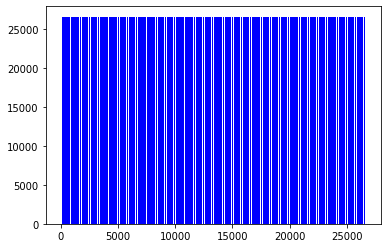

In [14]:
plt.bar(x_axis, high_poverty, color="b", align="center")

In [ ]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, cities)